**WELCOME TO F1 PREDICTION AND DATA REPRESENTATION (PROJECT FLATOUT)**






IN THIS NOTEBOOK WE WILL TRY TO : PREDICT LAP TIMES USING SEVERAL ALGOS. , REPRESENTING DATA FROM THE DATASETS AND MORE....... 😉😉😉😉

HERE WE USED 9 DIFFERENT ALGOS TO PREDICT A LAPTIME FOR LEWIS HAMILTON IN AUSTRALIAN GRAND PRIX , WE FACED OVERFITTING WITH MOST OF THE MODELS EVEN WITH CROSS VALIDATION EXCEPT KNN WHICH RESULTED 80% ACCURACY WHICH SEEMS A DECENT RESULT BECAUSE PREDICTING A LAP TIME IS NEARLY IMPOSSIBLE DUE TO ITS PARAMETERS SUCH AS : TIRES CONDITION , GRIP ON THE TRACK , WEATHER AND INFINTE NUMBER OF PARAMETERS  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the dataset from a CSV file
data = pd.read_csv('constructor_results22.csv')

# Preprocessing
X = data.drop('points', axis=1)  # Features
y = data['points']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print("Linear Regression MSE:", linear_reg_mse)
print("Linear Regression Test Score:", linear_reg.score(X_test_scaled, y_test))

# Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
dt_reg_predictions = dt_reg.predict(X_test_scaled)
dt_reg_mse = mean_squared_error(y_test, dt_reg_predictions)
print("Decision Tree Regression MSE:", dt_reg_mse)
print("Decision Tree Regression Test Score:", dt_reg.score(X_test_scaled, y_test))

# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)
rf_reg_predictions = rf_reg.predict(X_test_scaled)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Random Forest Regression Test Score:", rf_reg.score(X_test_scaled, y_test))

# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)
knn_reg_predictions = knn_reg.predict(X_test_scaled)
knn_reg_mse = mean_squared_error(y_test, knn_reg_predictions)
print("KNN Regression MSE:", knn_reg_mse)
print("KNN Regression Test Score:", knn_reg.score(X_test_scaled, y_test))

# Plot the dataset
#plt.scatter(X['points'], y, color='b', label='Actual')
#plt.scatter(X_test['knn'], knn_reg_predictions, color='r', label='KNN Regression')
#plt.xlabel('Actual Column Name')
#plt.ylabel('Points')
#plt.title('KNN Regression')
#plt.legend()
#plt.show()


Linear Regression MSE: 131.22400636792588
Linear Regression Test Score: 0.05847199750838672
Decision Tree Regression MSE: 81.61363636363636
Decision Tree Regression Test Score: 0.41442479811138244
Random Forest Regression MSE: 46.52946136363636
Random Forest Regression Test Score: 0.6661526192708662
KNN Regression MSE: 107.36454545454545
KNN Regression Test Score: 0.2296628580534935


In [4]:
!pip install fastf1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Qualifying [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
DEBUG:fastf1.ergast:Failed to parse timestamp '' in Ergastresponse.
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found f

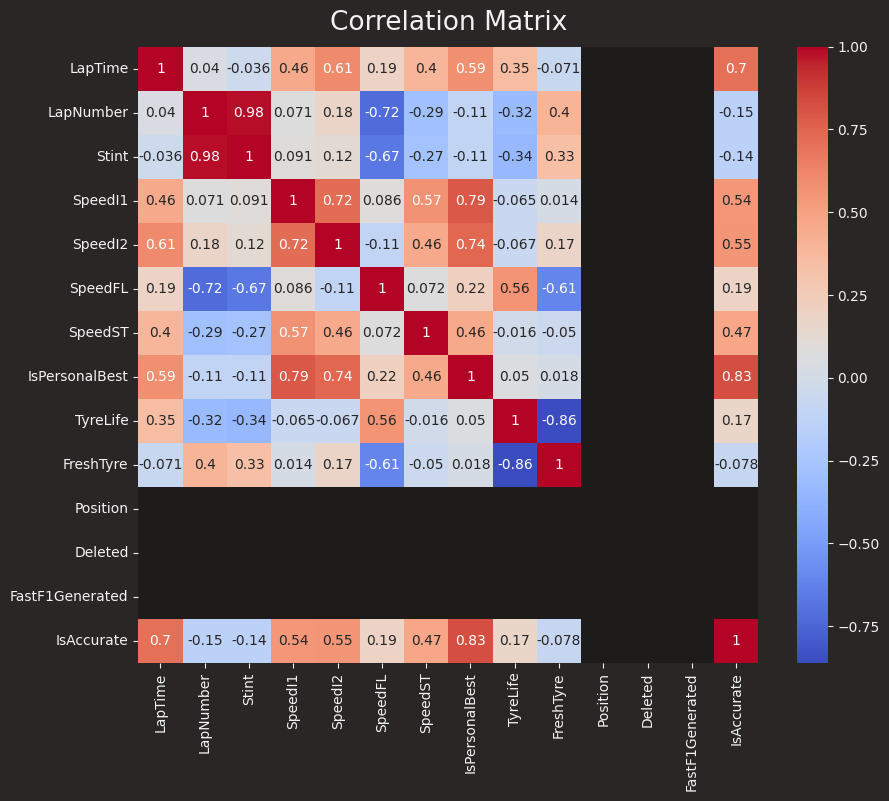

In [ ]:
import fastf1 #SIII
import seaborn as sns
import matplotlib.pyplot as plt

# Load FastF1 session data
race = fastf1.get_session(2023, "Azerbaijan", 'Q')
race.load()

# Extract driver lap times
driver_laps = race.laps.pick_driver("ALO")

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

# Create correlation matrix
correlation_matrix = driver_laps.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


core           INFO 	Loading data for British Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for lap_coun

Linear Regression R-squared: 77.59019930770414
Decision Tree Regression R-squared: 100.0
KNN Regression R-squared: 90.92423840693539
SVM Regression R-squared: -9.89237785002226
   index                   Time Driver DriverNumber      LapTime  LapNumber  \
0      4 0 days 01:48:26.087000    HAM           44  93049000000        5.0   
1      5 0 days 01:49:59.200000    HAM           44  93113000000        6.0   
2      6 0 days 01:51:31.938000    HAM           44  92738000000        7.0   
3      7 0 days 01:53:04.866000    HAM           44  92928000000        8.0   
4      8 0 days 01:54:37.879000    HAM           44  93013000000        9.0   

   Stint PitOutTime PitInTime            Sector1Time  ... FreshTyre      Team  \
0    2.0        NaT       NaT 0 days 00:00:29.390000  ...     False  Mercedes   
1    2.0        NaT       NaT 0 days 00:00:29.523000  ...     False  Mercedes   
2    2.0        NaT       NaT 0 days 00:00:29.324000  ...     False  Mercedes   
3    2.0        NaT     

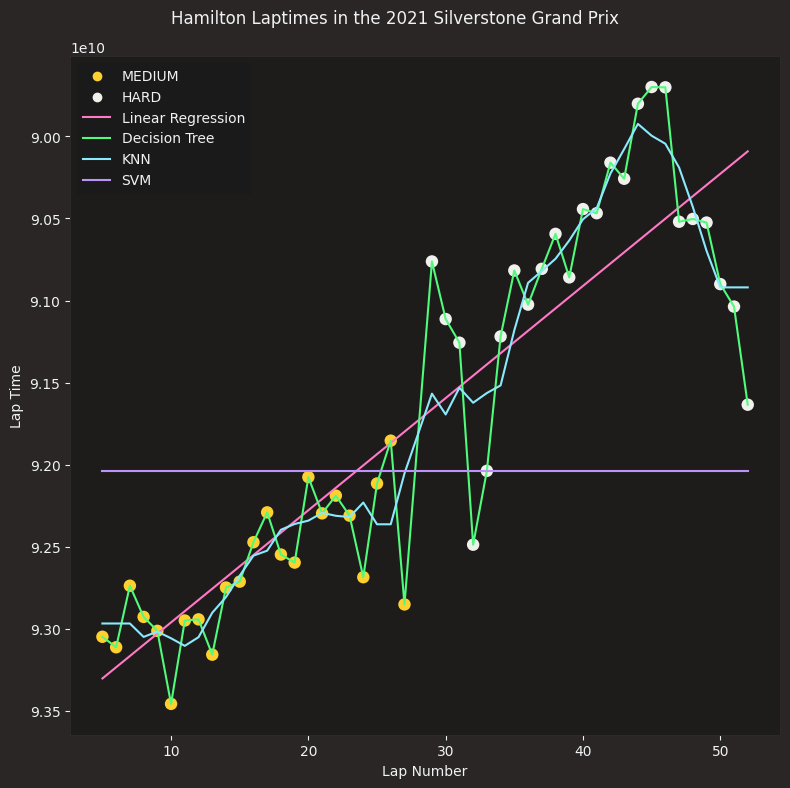

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2021, "Silverstone", 'R')
race.load()
driver_laps = race.laps.pick_driver("HAM").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Hamilton Laptimes in the 2021 Silverstone Grand Prix")

# Perform linear regression
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)
y_pred_linear = linear_regression_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print("Linear Regression R-squared:", r2_linear * 100)

# Perform Decision Tree regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)
y_pred_decision_tree = decision_tree_model.predict(X)
r2_decision_tree = r2_score(y, y_pred_decision_tree)
print("Decision Tree Regression R-squared:", r2_decision_tree * 100)

# Perform KNN regression
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)
r2_knn = r2_score(y, y_pred_knn)
print("KNN Regression R-squared:", r2_knn * 100)

# Perform SVM regression
svm_model = SVR()
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
r2_svm = r2_score(y, y_pred_svm)
print("SVM Regression R-squared:", r2_svm * 100)

ax.plot(X, y_pred_linear, label='Linear Regression')
ax.plot(X, y_pred_decision_tree, label='Decision Tree')
ax.plot(X, y_pred_knn, label='KNN')
ax.plot(X, y_pred_svm, label='SVM')

plt.legend()
plt.tight_layout()

# Display the head of the DataFrame
print(driver_laps.head())

plt.show()


req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for British Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:f

Linear Regression R-squared: 77.59019930770414
Decision Tree Regression R-squared: 100.0
KNN Regression R-squared: 90.92423840693539
SVM Regression R-squared: -9.89237785002226
Gaussian Naive Bayes Regression R-squared: 100.0
   index                   Time Driver DriverNumber      LapTime  LapNumber  \
0      4 0 days 01:48:26.087000    HAM           44  93049000000        5.0   
1      5 0 days 01:49:59.200000    HAM           44  93113000000        6.0   
2      6 0 days 01:51:31.938000    HAM           44  92738000000        7.0   
3      7 0 days 01:53:04.866000    HAM           44  92928000000        8.0   
4      8 0 days 01:54:37.879000    HAM           44  93013000000        9.0   

   Stint PitOutTime PitInTime            Sector1Time  ... FreshTyre      Team  \
0    2.0        NaT       NaT 0 days 00:00:29.390000  ...     False  Mercedes   
1    2.0        NaT       NaT 0 days 00:00:29.523000  ...     False  Mercedes   
2    2.0        NaT       NaT 0 days 00:00:29.324000  ..

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


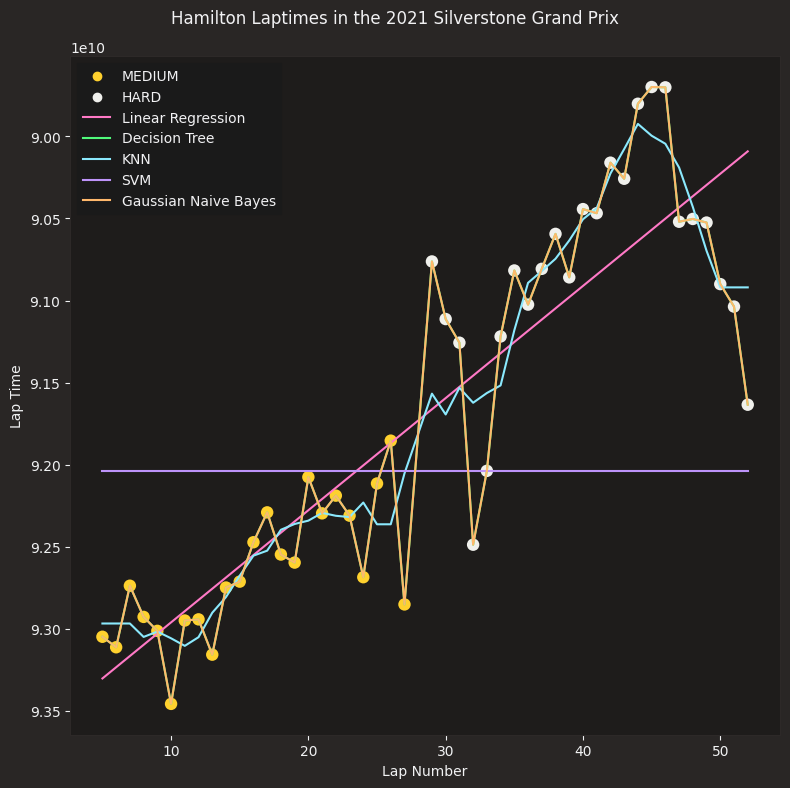

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for la

   index                   Time Driver DriverNumber       LapTime  LapNumber  \
0    154 0 days 01:06:44.092000    ALO           14  108064000000        2.0   
1    155 0 days 01:08:31.874000    ALO           14  107782000000        3.0   
2    156 0 days 01:10:19.786000    ALO           14  107912000000        4.0   
3    157 0 days 01:12:07.685000    ALO           14  107899000000        5.0   
4    158 0 days 01:13:56.052000    ALO           14  108367000000        6.0   

   Stint PitOutTime PitInTime            Sector1Time  ... FreshTyre  \
0    1.0        NaT       NaT 0 days 00:00:38.837000  ...     False   
1    1.0        NaT       NaT 0 days 00:00:38.471000  ...     False   
2    1.0        NaT       NaT 0 days 00:00:38.499000  ...     False   
3    1.0        NaT       NaT 0 days 00:00:38.434000  ...     False   
4    1.0        NaT       NaT 0 days 00:00:38.499000  ...     False   

           Team           LapStartTime            LapStartDate TrackStatus  \
0  Aston Marti

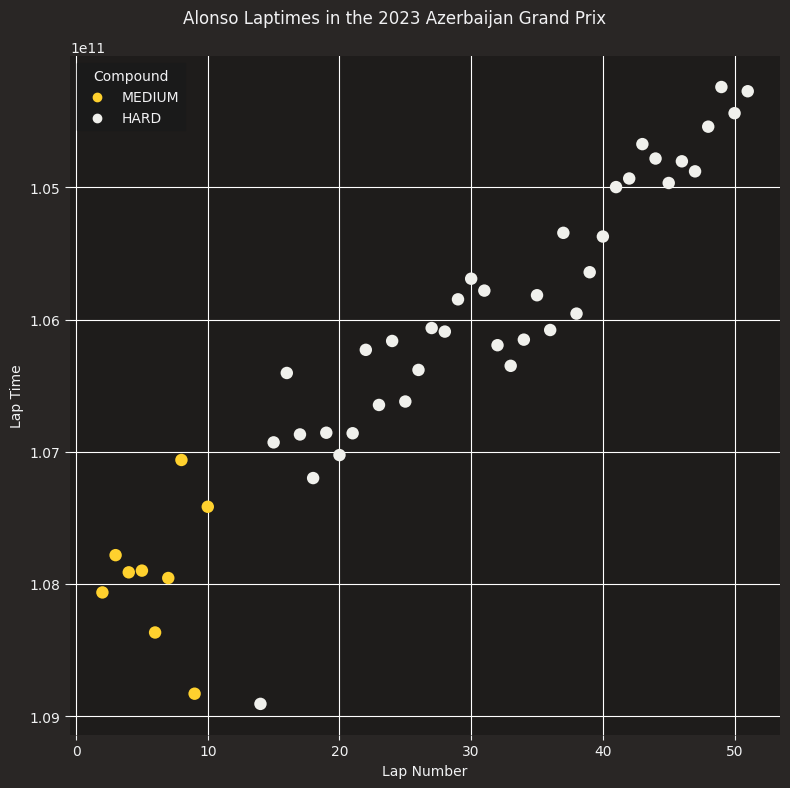

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import r2_score

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

# Display the first few rows of the lap data
print(driver_laps.head())

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

# Perform linear regression
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)
y_pred_linear = linear_regression_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print("Linear Regression R-squared:", r2_linear*100)

# Perform logistic regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X, y)
y_pred_logistic = logistic_regression_model.predict(X)
r2_logistic = r2_score(y, y_pred_logistic)
print("Logistic Regression R-squared:", r2_logistic*100)

# Perform lasso regression
lasso_regression_model = Lasso()
lasso_regression_model.fit(X, y)
y_pred_lasso = lasso_regression_model.predict(X)
r2_lasso = r2_score(y, y_pred_lasso)
print("Lasso Regression R-squared:", r2_lasso*100)

# Perform ridge regression
ridge_regression_model = Ridge()
ridge_regression_model.fit(X, y)
y_pred_ridge = ridge_regression_model.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge*100)

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
INFO:fastf1.fastf1.req:Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for c

Linear Regression R-squared: 88.47188705958828
Lasso Regression R-squared: 88.47188705958833
Ridge Regression R-squared: 88.47188612709921
Decision Tree Regression R-squared: 100.0
KNN Regression R-squared: 90.00835109153311
SVM Regression R-squared: -0.6773567744447817


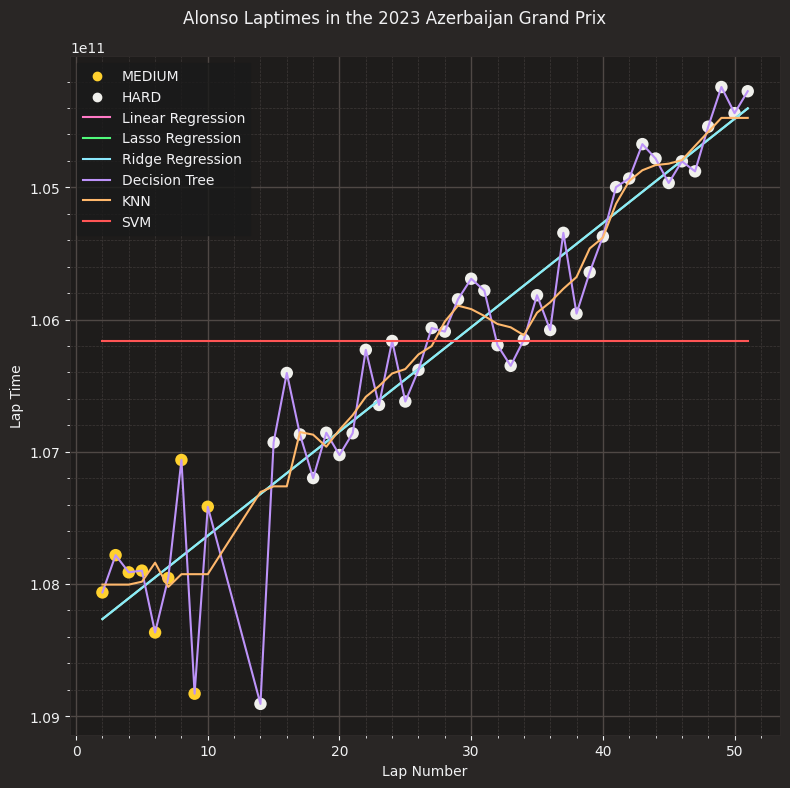

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Perform linear regression
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)
y_pred_linear = linear_regression_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print("Linear Regression R-squared:", r2_linear * 100)

# Perform lasso regression
lasso_regression_model = Lasso()
lasso_regression_model.fit(X, y)
y_pred_lasso = lasso_regression_model.predict(X)
r2_lasso = r2_score(y, y_pred_lasso)
print("Lasso Regression R-squared:", r2_lasso * 100)

# Perform ridge regression
ridge_regression_model = Ridge()
ridge_regression_model.fit(X, y)
y_pred_ridge = ridge_regression_model.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge * 100)

# Perform Decision Tree regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)
y_pred_decision_tree = decision_tree_model.predict(X)
r2_decision_tree = r2_score(y, y_pred_decision_tree)
print("Decision Tree Regression R-squared:", r2_decision_tree * 100)

# Perform KNN regression
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)
r2_knn = r2_score(y, y_pred_knn)
print("KNN Regression R-squared:", r2_knn * 100)

# Perform SVM regression
svm_model = SVR()
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
r2_svm = r2_score(y, y_pred_svm)
print("SVM Regression R-squared:", r2_svm * 100)

ax.plot(X, y_pred_linear, label='Linear Regression')
ax.plot(X, y_pred_lasso, label='Lasso Regression')
ax.plot(X, y_pred_ridge, label='Ridge Regression')
ax.plot(X, y_pred_decision_tree, label='Decision Tree')
ax.plot(X, y_pred_knn, label='KNN')
ax.plot(X, y_pred_svm, label='SVM')

plt.legend()
plt.tight_layout()
plt.show()


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
INFO:fastf1.fastf1.req:Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for c

Linear Regression R-squared: 88.47188705958828
Lasso Regression R-squared: 88.47188705958833
Ridge Regression R-squared: 88.47188612709921
Decision Tree Regression R-squared: 100.0
KNN Regression R-squared: 90.00835109153311
SVM Regression R-squared: -0.6773567744447817
Random Forest Regression R-squared: 97.34067873469796


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression R-squared: 99.71688446445759


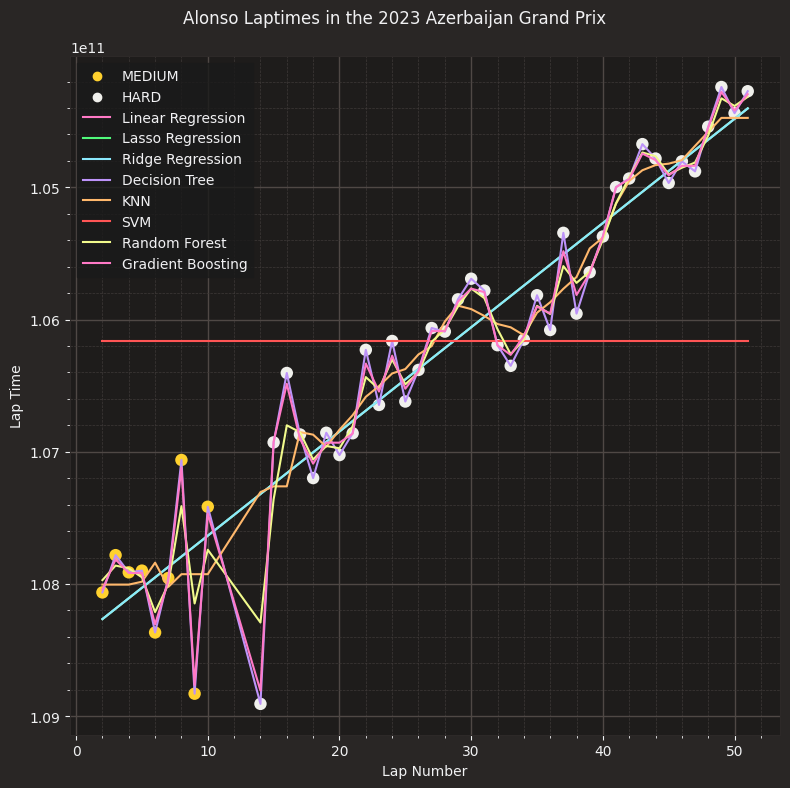

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Perform linear regression
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)
y_pred_linear = linear_regression_model.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print("Linear Regression R-squared:", r2_linear * 100)

# Perform lasso regression
lasso_regression_model = Lasso()
lasso_regression_model.fit(X, y)
y_pred_lasso = lasso_regression_model.predict(X)
r2_lasso = r2_score(y, y_pred_lasso)
print("Lasso Regression R-squared:", r2_lasso * 100)

# Perform ridge regression
ridge_regression_model = Ridge()
ridge_regression_model.fit(X, y)
y_pred_ridge = ridge_regression_model.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)
print("Ridge Regression R-squared:", r2_ridge * 100)

# Perform Decision Tree regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)
y_pred_decision_tree = decision_tree_model.predict(X)
r2_decision_tree = r2_score(y, y_pred_decision_tree)
print("Decision Tree Regression R-squared:", r2_decision_tree * 100)

# Perform KNN regression
knn_model = KNeighborsRegressor()
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)
r2_knn = r2_score(y, y_pred_knn)
print("KNN Regression R-squared:", r2_knn * 100)

# Perform SVM regression
svm_model = SVR()
svm_model.fit(X, y)
y_pred_svm = svm_model.predict(X)
r2_svm = r2_score(y, y_pred_svm)
print("SVM Regression R-squared:", r2_svm * 100)

# Perform Random Forest regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X, y)
y_pred_random_forest = random_forest_model.predict(X)
r2_random_forest = r2_score(y, y_pred_random_forest)
print("Random Forest Regression R-squared:", r2_random_forest * 100)

# Perform Gradient Boosting regression
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X, y)
y_pred_gradient_boosting = gradient_boosting_model.predict(X)
r2_gradient_boosting = r2_score(y, y_pred_gradient_boosting)
print("Gradient Boosting Regression R-squared:", r2_gradient_boosting * 100)

ax.plot(X, y_pred_linear, label='Linear Regression')
ax.plot(X, y_pred_lasso, label='Lasso Regression')
ax.plot(X, y_pred_ridge, label='Ridge Regression')
ax.plot(X, y_pred_decision_tree, label='Decision Tree')
ax.plot(X, y_pred_knn, label='KNN')
ax.plot(X, y_pred_svm, label='SVM')
ax.plot(X, y_pred_random_forest, label='Random Forest')
ax.plot(X, y_pred_gradient_boosting, label='Gradient Boosting')

plt.legend()
plt.tight_layout()
plt.show()


#TEST **RESULTS**

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for la

   index                   Time Driver DriverNumber       LapTime  LapNumber  \
0    154 0 days 01:06:44.092000    ALO           14  108064000000        2.0   
1    155 0 days 01:08:31.874000    ALO           14  107782000000        3.0   
2    156 0 days 01:10:19.786000    ALO           14  107912000000        4.0   
3    157 0 days 01:12:07.685000    ALO           14  107899000000        5.0   
4    158 0 days 01:13:56.052000    ALO           14  108367000000        6.0   

   Stint PitOutTime PitInTime            Sector1Time  ... FreshTyre  \
0    1.0        NaT       NaT 0 days 00:00:38.837000  ...     False   
1    1.0        NaT       NaT 0 days 00:00:38.471000  ...     False   
2    1.0        NaT       NaT 0 days 00:00:38.499000  ...     False   
3    1.0        NaT       NaT 0 days 00:00:38.434000  ...     False   
4    1.0        NaT       NaT 0 days 00:00:38.499000  ...     False   

           Team           LapStartTime            LapStartDate TrackStatus  \
0  Aston Marti

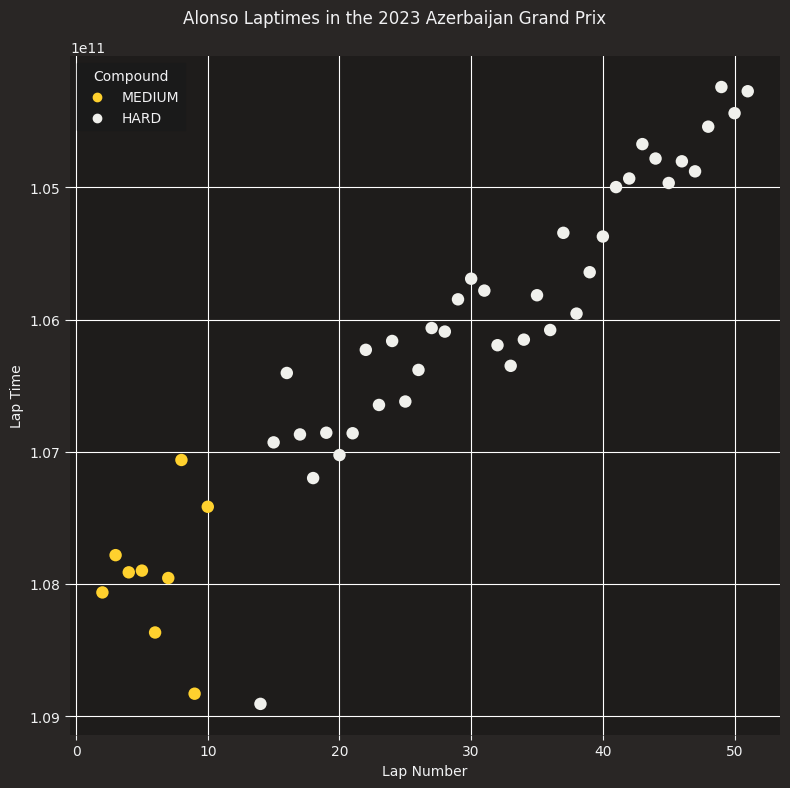

In [20]:
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

# Display the first few rows of the lap data
print(driver_laps.head())

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

# Split the data into training and testing sets
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression on the training set
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_linear_train = linear_regression_model.predict(X_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
print("Linear Regression Training R-squared:", r2_linear_train*100)
y_pred_linear_test = linear_regression_model.predict(X_test)
r2_linear_test = r2_score(y_test, y_pred_linear_test)
print("Linear Regression Test R-squared:", r2_linear_test*100)

# Perform logistic regression on the training set
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_train = logistic_regression_model.predict(X_train)
r2_logistic_train = r2_score(y_train, y_pred_logistic_train)
print("Logistic Regression Training R-squared:", r2_logistic_train*100)
y_pred_logistic_test = logistic_regression_model.predict(X_test)
r2_logistic_test = r2_score(y_test, y_pred_logistic_test)
print("Logistic Regression Test R-squared:", r2_logistic_test*100)

# Perform lasso regression on the training set
lasso_regression_model = Lasso()
lasso_regression_model.fit(X_train, y_train)
y_pred_lasso_train = lasso_regression_model.predict(X_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
print("Lasso Regression Training R-squared:", r2_lasso_train*100)
y_pred_lasso_test = lasso_regression_model.predict(X_test)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
print("Lasso Regression Test R-squared:", r2_lasso_test*100)

# Perform ridge regression on the training set
ridge_regression_model = Ridge()
ridge_regression_model.fit(X_train, y_train)
y_pred_ridge_train = ridge_regression_model.predict(X_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
print("Ridge Regression Training R-squared:", r2_ridge_train*100)
y_pred_ridge_test = ridge_regression_model.predict(X_test)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
print("Ridge Regression Test R-squared:", r2_ridge_test*100)

# Perform KNN regression on the training set
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn_train = knn_model.predict(X_train)
r2_knn_train = r2_score(y_train, y_pred_knn_train)
print("KNN Regression Training R-squared:", r2_knn_train*100)
y_pred_knn_test = knn_model.predict(X_test)
r2_knn_test = r2_score(y_test, y_pred_knn_test)
print("KNN Regression Test R-squared:", r2_knn_test*100)

# Perform SVM regression on the training set
svm_model = SVR()
svm_model.fit(X_train, y_train.ravel())
y_pred_svm_train = svm_model.predict(X_train)
r2_svm_train = r2_score(y_train, y_pred_svm_train)
print("SVM Regression Training R-squared:", r2_svm_train*100)
y_pred_svm_test = svm_model.predict(X_test)
r2_svm_test = r2_score(y_test, y_pred_svm_test)
print("SVM Regression Test R-squared:", r2_svm_test*100)

plt.tight_layout()
plt.show()


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
INFO:fastf1.fastf1.req:Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for c

Linear Regression Test R-squared: 91.69592824712292
Lasso Regression Test R-squared: 91.69592824562783
Ridge Regression Test R-squared: 91.69281384383734
Decision Tree Regression Test R-squared: 86.51386194751828
KNN Regression Test R-squared: 87.27646976429057
SVM Regression Test R-squared: -16.34320580400075
Random Forest Regression Test R-squared: 90.67434070367409


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression Test R-squared: 88.17989301975221


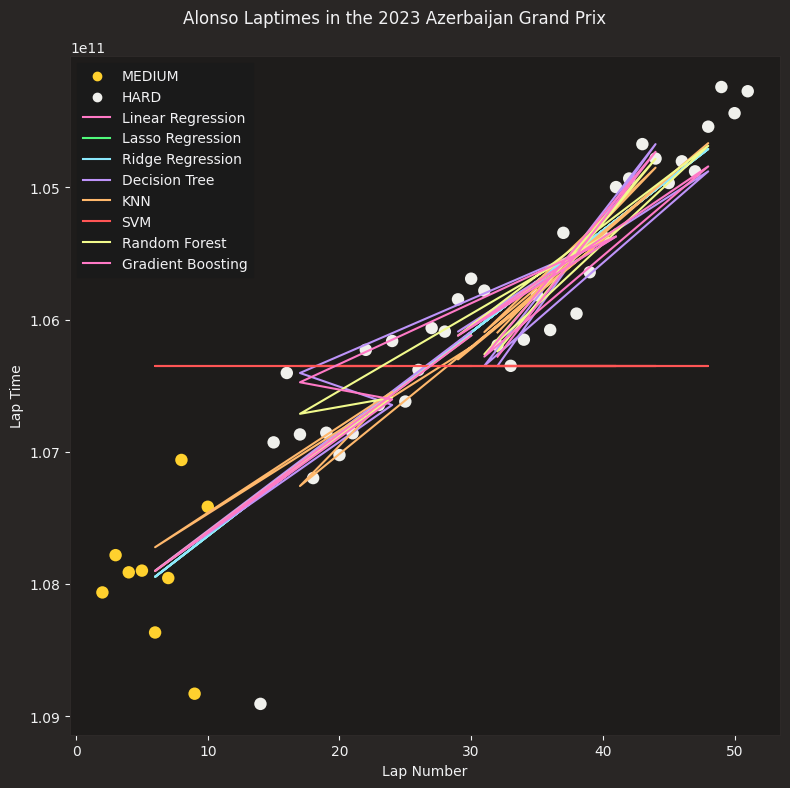

In [23]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()
driver_laps = race.laps.pick_driver("ALO").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Perform train-test split
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_linear = linear_regression_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Test R-squared:", r2_linear * 100)

# Perform lasso regression
lasso_regression_model = Lasso()
lasso_regression_model.fit(X_train, y_train)
y_pred_lasso = lasso_regression_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression Test R-squared:", r2_lasso * 100)

# Perform ridge regression
ridge_regression_model = Ridge()
ridge_regression_model.fit(X_train, y_train)
y_pred_ridge = ridge_regression_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression Test R-squared:", r2_ridge * 100)

# Perform Decision Tree regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print("Decision Tree Regression Test R-squared:", r2_decision_tree * 100)

# Perform KNN regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN Regression Test R-squared:", r2_knn * 100)

# Perform SVM regression
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM Regression Test R-squared:", r2_svm * 100)

# Perform Random Forest regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print("Random Forest Regression Test R-squared:", r2_random_forest * 100)

# Perform Gradient Boosting regression
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Regression Test R-squared:", r2_gradient_boosting * 100)

ax.plot(X_test, y_pred_linear, label='Linear Regression')
ax.plot(X_test, y_pred_lasso, label='Lasso Regression')
ax.plot(X_test, y_pred_ridge, label='Ridge Regression')
ax.plot(X_test, y_pred_decision_tree, label='Decision Tree')
ax.plot(X_test, y_pred_knn, label='KNN')
ax.plot(X_test, y_pred_svm, label='SVM')
ax.plot(X_test, y_pred_random_forest, label='Random Forest')
ax.plot(X_test, y_pred_gradient_boosting, label='Gradient Boosting')

plt.legend()
plt.tight_layout()
plt.show()


core           INFO 	Loading data for British Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
INFO:fastf1.fastf1.req:Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_dat

Linear Regression Training R-squared: 79.38511450293257
Linear Regression Test R-squared: 70.06527635326259
KNN Regression Training R-squared: 91.76444909776589
KNN Regression Test R-squared: 62.14471895475
SVM Regression Training R-squared: -9.52238176024367
SVM Regression Test R-squared: -25.589322545916747
Decision Tree Regression Training R-squared: 100.0
Decision Tree Regression Test R-squared: 75.07236134520275
   index                   Time Driver DriverNumber      LapTime  LapNumber  \
0      4 0 days 01:48:26.087000    HAM           44  93049000000        5.0   
1      5 0 days 01:49:59.200000    HAM           44  93113000000        6.0   
2      6 0 days 01:51:31.938000    HAM           44  92738000000        7.0   
3      7 0 days 01:53:04.866000    HAM           44  92928000000        8.0   
4      8 0 days 01:54:37.879000    HAM           44  93013000000        9.0   

   Stint PitOutTime PitInTime            Sector1Time  ... FreshTyre      Team  \
0    2.0        NaT    

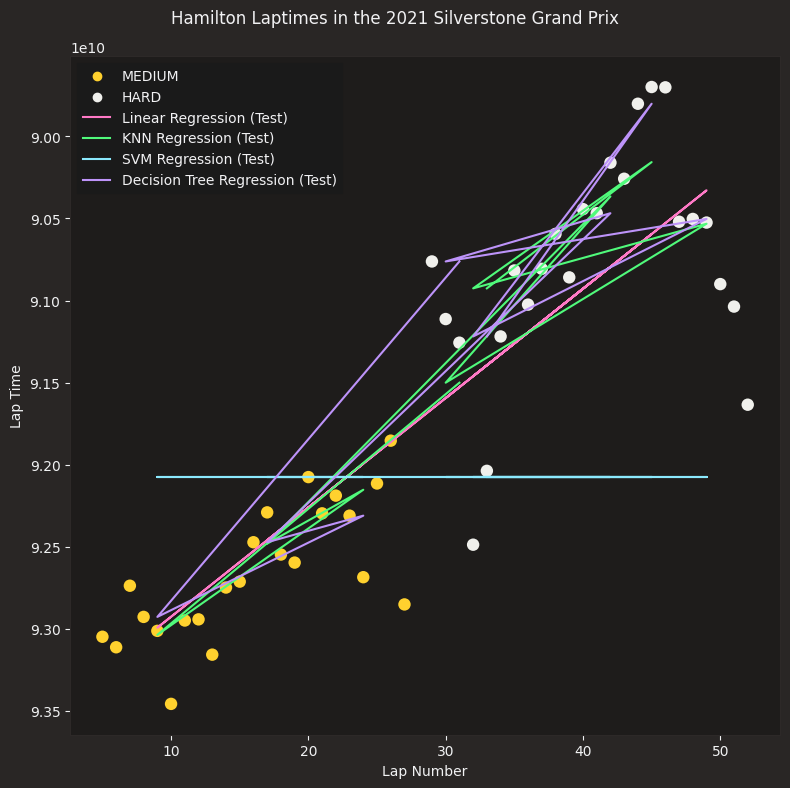

In [19]:
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
race = fastf1.get_session(2021, "Silverstone", 'R')
race.load()
driver_laps = race.laps.pick_driver("HAM").pick_quicklaps().reset_index()

# Convert lap time values to numeric format
driver_laps["LapTime"] = pd.to_numeric(driver_laps["LapTime"], errors='coerce')

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=driver_laps,
    x="LapNumber",
    y="LapTime",
    ax=ax,
    hue="Compound",
    palette=fastf1.plotting.COMPOUND_COLORS,
    s=80,
    linewidth=0,
    legend='auto'
)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Hamilton Laptimes in the 2021 Silverstone Grand Prix")

# Split the data into training and testing sets
X = driver_laps["LapNumber"].values.reshape(-1, 1)
y = driver_laps["LapTime"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression on the training set
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_train_linear = linear_regression_model.predict(X_train)
r2_train_linear = r2_score(y_train, y_pred_train_linear)
print("Linear Regression Training R-squared:", r2_train_linear * 100)

# Predict on the test set and calculate R-squared
y_pred_test_linear = linear_regression_model.predict(X_test)
r2_test_linear = r2_score(y_test, y_pred_test_linear)
print("Linear Regression Test R-squared:", r2_test_linear * 100)

# Perform KNN regression on the training set
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_train_knn = knn_model.predict(X_train)
r2_train_knn = r2_score(y_train, y_pred_train_knn)
print("KNN Regression Training R-squared:", r2_train_knn * 100)

# Predict on the test set and calculate R-squared
y_pred_test_knn = knn_model.predict(X_test)
r2_test_knn = r2_score(y_test, y_pred_test_knn)
print("KNN Regression Test R-squared:", r2_test_knn * 100)

# Perform SVM regression on the training set
svm_model = SVR()
svm_model.fit(X_train, y_train.ravel())
y_pred_train_svm = svm_model.predict(X_train)
r2_train_svm = r2_score(y_train, y_pred_train_svm)
print("SVM Regression Training R-squared:", r2_train_svm * 100)

# Predict on the test set and calculate R-squared
y_pred_test_svm = svm_model.predict(X_test)
r2_test_svm = r2_score(y_test, y_pred_test_svm)
print("SVM Regression Test R-squared:", r2_test_svm * 100)

# Perform Decision Tree regression on the training set
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_train_decision_tree = decision_tree_model.predict(X_train)
r2_train_decision_tree = r2_score(y_train, y_pred_train_decision_tree)
print("Decision Tree Regression Training R-squared:", r2_train_decision_tree * 100)

# Predict on the test set and calculate R-squared
y_pred_test_decision_tree = decision_tree_model.predict(X_test)
r2_test_decision_tree = r2_score(y_test, y_pred_test_decision_tree)
print("Decision Tree Regression Test R-squared:", r2_test_decision_tree * 100)

#ax.plot(X_train, y_pred_train_linear, label='Linear Regression (Train)')
ax.plot(X_test, y_pred_test_linear, label='Linear Regression (Test)')
#ax.plot(X_train, y_pred_train_knn, label='KNN Regression (Train)')
ax.plot(X_test, y_pred_test_knn, label='KNN Regression (Test)')
#ax.plot(X_train, y_pred_train_svm, label='SVM Regression (Train)')
ax.plot(X_test, y_pred_test_svm, label='SVM Regression (Test)')
##ax.plot(X_train, y_pred_train_decision_tree, label='Decision Tree Regression (Train)')
ax.plot(X_test, y_pred_test_decision_tree, label='Decision Tree Regression (Test)')

plt.legend()
plt.tight_layout()

# Display the head of the DataFrame
print(driver_laps.head())

plt.show()


# **DATA REPRESENTATION**





req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.2]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.0.2]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf

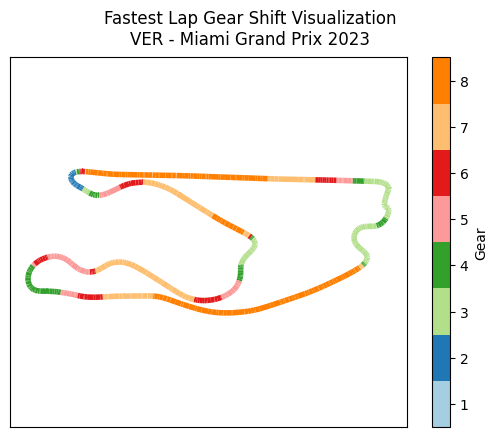

In [ ]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


session = fastf1.get_session(2023, 'Miami Grand Prix', 'R')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
# sphinx_gallery_defer_figures

##############################################################################
# Prepare the data for plotting by converting it to the appropriate numpy
# data types

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
# sphinx_gallery_defer_figures

##############################################################################
# Create a line collection. Set a segmented colormap and normalize the plot
# to full integer values of the colormap

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
# sphinx_gallery_defer_figures

##############################################################################
# Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
# sphinx_gallery_defer_figures


##############################################################################
# Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
# are centered for each color segment.

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf

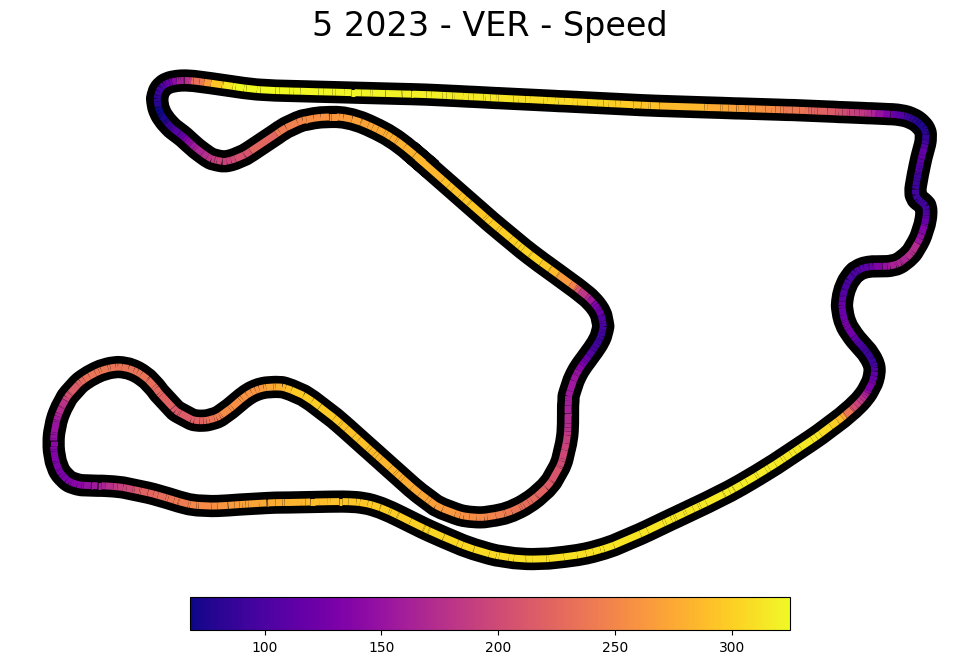

In [5]:

import fastf1 as ff1
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2023
wknd = 5
ses = 'R'
driver = 'VER'
colormap = mpl.cm.plasma



# Next, we load the session and select the desired data.
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)



# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.2]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.0.2]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for lap_coun

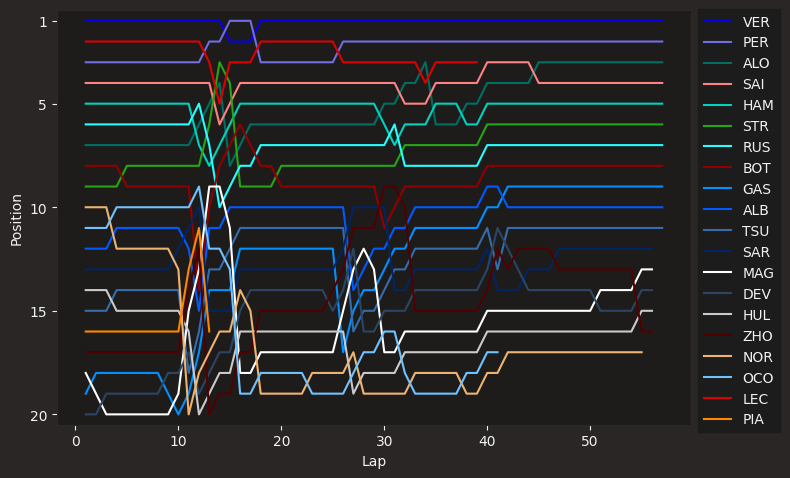

In [ ]:
import fastf1.plotting
import matplotlib.pyplot as plt


fastf1.plotting.setup_mpl(misc_mpl_mods=False)

##############################################################################
# Load the session and create the plot
session = fastf1.get_session(2023, "Miami", 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(8.0, 4.9))
# sphinx_gallery_defer_figures

##############################################################################
# For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
# using the value of the first lap, get their color and then plot their
# position over the number of laps.
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
# sphinx_gallery_defer_figures

##############################################################################
# Finalize the plot by setting y-limits that invert the y-axis so that position
# one is at the top, set custom tick positions and axis labels.
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
# sphinx_gallery_defer_figures

##############################################################################
# Because this plot is very crowed, add the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Qualifying [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data fo

['PER' 'ALO' 'SAI' 'MAG' 'GAS' 'RUS' 'LEC' 'OCO' 'VER' 'BOT' 'ALB' 'HUL'
 'HAM' 'ZHO' 'DEV' 'NOR' 'TSU' 'STR' 'PIA' 'SAR']
   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:26.814000        0 days 00:00:00
1     PER 0 days 00:01:26.841000 0 days 00:00:00.027000
2     ALO 0 days 00:01:27.202000 0 days 00:00:00.388000
3     SAI 0 days 00:01:27.349000 0 days 00:00:00.535000
4     BOT 0 days 00:01:27.564000 0 days 00:00:00.750000
5     MAG 0 days 00:01:27.767000 0 days 00:00:00.953000
6     GAS 0 days 00:01:27.786000 0 days 00:00:00.972000
7     ALB 0 days 00:01:27.795000 0 days 00:00:00.981000
8     RUS 0 days 00:01:27.804000 0 days 00:00:00.990000
9     LEC 0 days 00:01:27.861000 0 days 00:00:01.047000
10    HUL 0 days 00:01:27.903000 0 days 00:00:01.089000
11    OCO 0 days 00:01:27.935000 0 days 00:00:01.121000
12    HAM 0 days 00:01:27.975000 0 days 00:00:01.161000
13    ZHO 0 days 00:01:28.091000 0 days 00:00:01.277000
14    NOR 0 days 00:01:28.394000 0 da

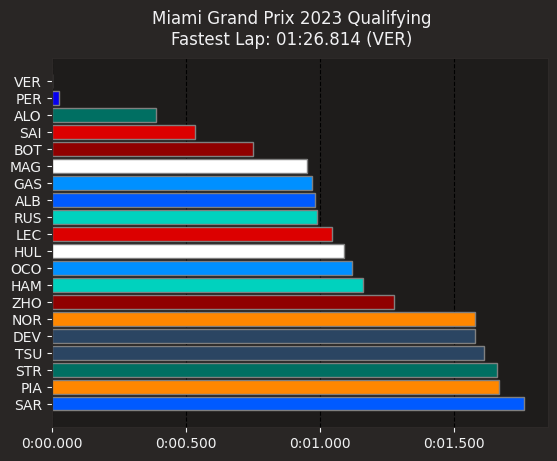

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps
# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2023, 'Miami ', 'Q')
session.load()


##############################################################################
# First, we need to get an array of all drivers.

drivers = pd.unique(session.laps['Driver'])
print(drivers)


##############################################################################
# After that we'll get each drivers fastest lap, create a new laps object
# from these laps, sort them by lap time and have pandas reindex them to
# number them nicely by starting position.

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)


##############################################################################
# The plot is nicer to look at and more easily understandable if we just plot
# the time differences. Therefore we subtract the fastest lap time from all
# other lap times.

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']


##############################################################################
# We can take a quick look at the laps we have to check if everything
# looks all right. For this, we'll just check the 'Driver', 'LapTime'
# and 'LapTimeDelta' columns.

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])


##############################################################################
# Finally, we'll create a list of team colors per lap to color our plot.
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)


##############################################################################
# Now, we can plot all the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
# sphinx_gallery_defer_figures


##############################################################################
# Finally, give the plot a meaningful title

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()


core           INFO 	Loading data for Miami Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.0.3]
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
INFO:fastf1.fastf1.req:No cached data found for lap_count. L

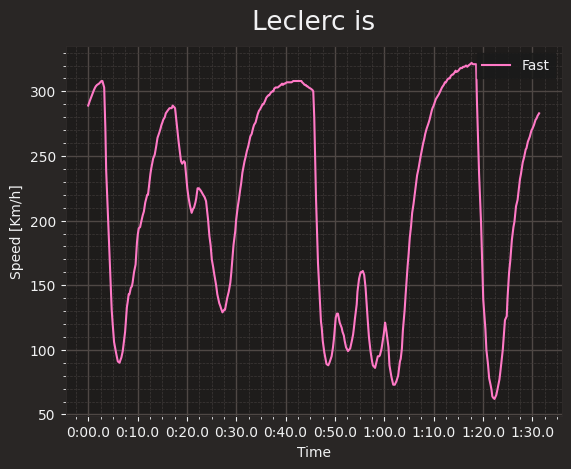

In [ ]:

from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2023, 'Miami', 'R')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
INFO:fastf1.fastf1.req:Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for car_dat

['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
['VER', 'PER', 'ALO', 'SAI', 'HAM', 'STR', 'RUS', 'BOT', 'GAS', 'ALB', 'TSU', 'SAR', 'MAG', 'DEV', 'HUL', 'ZHO', 'NOR', 'OCO', 'LEC', 'PIA']
   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT           11
1     ALB    2.0     SOFT           15
2     ALB    3.0     HARD           14
3     ALB    4.0     SOFT           17
4     ALO    1.0     SOFT           14
..    ...    ...      ...          ...
65    VER    3.0     HARD           21
66    ZHO    1.0     SOFT           12
67    ZHO    2.0     HARD           20
68    ZHO    3.0     SOFT           22
69    ZHO    4.0     SOFT            2

[70 rows x 4 columns]


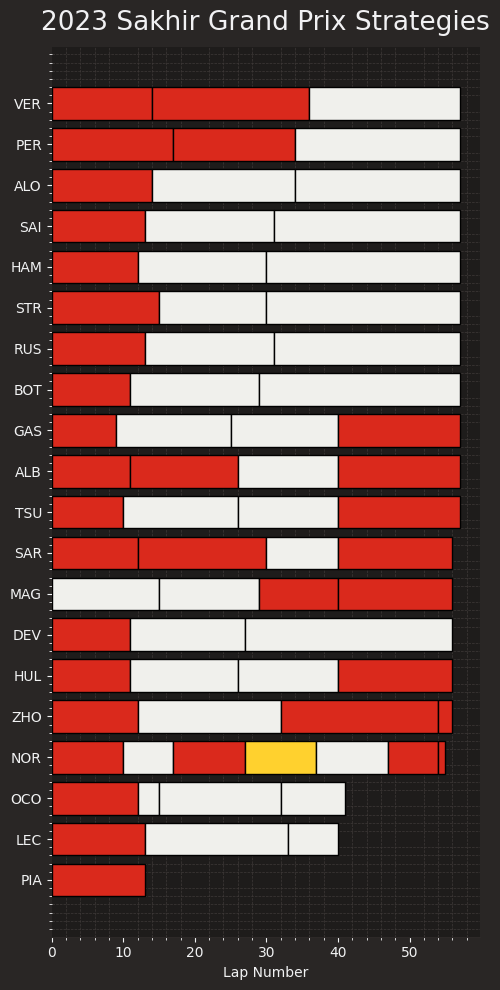

In [ ]:
import fastf1
import fastf1.plotting
from matplotlib import pyplot as plt
session = fastf1.get_session(2023, "Sakhir", 'R')
session.load()
laps = session.laps
drivers = session.drivers
print(drivers)
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
plt.title("2023 Sakhir Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()